<p style="background-color:mediumpurple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Logistic Regression - Iris Dataset</b></p>

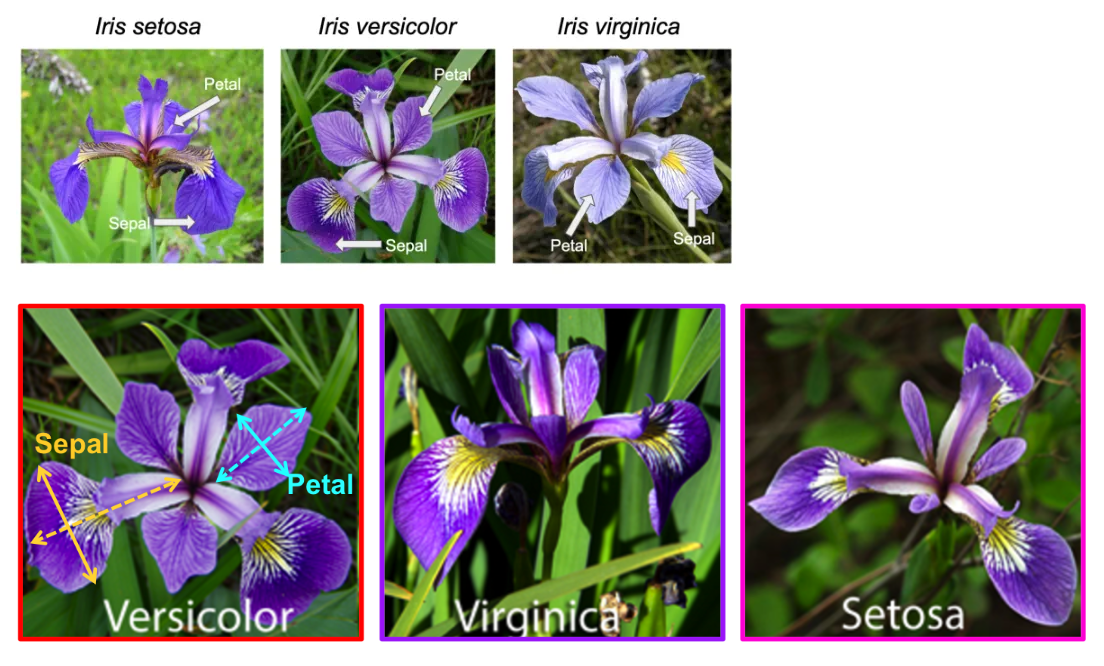

# <font color='mediumpurple'> <b>Importing Libraries</b><font color='black'>  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

plt.rcParams["figure.figsize"] = (8,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='mediumpurple'> <b>Loading Dataset</b><font color='black'>  

In [3]:
# from sklearn
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

df.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
88               5.600             3.000              4.100             1.300   
66               5.600             3.000              4.500             1.500   
67               5.800             2.700              4.100             1.000   
44               5.100             3.800              1.900             0.400   
19               5.100             3.800              1.500             0.300   
84               5.400             3.000              4.500             1.500   
10               5.400             3.700              1.500             0.200   
115              6.400             3.200              5.300             2.300   
53               5.500             2.300              4.000             1.300   
70               5.900             3.200              4.800             1.800   

     species  
88         1  
66         1  
67         1  
44         0  
19         0  
84         1  
10         0  
115        2  
53         1  
70         1

It encodes **alphabetically** in the species column.
- setosa: 0
- versicolor: 1
- virginica: 2

In [5]:
# from local
# df = pd.read_csv("iris.csv")
# df.head()

**Dataset Overview**

The **Iris dataset** is a classic dataset frequently used in the fields of machine learning and statistics. It was first introduced by Ronald Fisher in 1936 and is commonly used to distinguish between three different species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). This dataset is widely used for training and testing classification algorithms in machine learning and statistical applications.

**Details of the Iris Dataset:**

The Iris dataset contains a total of 150 flower samples, with each species of Iris flower represented by 50 samples:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

For each flower sample, four features have been recorded:

1. **sepal_length**: The length of the sepal (the outer part of the flower that protects the petals).
2. **sepal_width**: The width of the sepal.
3. **petal_length**: The length of the petal (the colorful, showy part of the flower).
4. **petal_width**: The width of the petal.

These features are measured in centimeters (cm).

**Objective:**

The objective is to create a model that can predict the species of the flower using these four features. In other words, the Iris dataset is used as a dataset for a supervised learning problem. The goal of the model is to accurately classify the flower species based on the given features.

**Summary:**

The Iris dataset contains 150 flower samples, each representing one of three Iris species. Four features (sepal_length, sepal_width, petal_length, petal_width) have been measured for each sample. These features are used to distinguish between the different Iris species.

- **Sepal Length:** The length of the sepal.
- **Sepal Width:** The width of the sepal.
- **Petal Length:** The length of the petal.
- **Petal Width:** The width of the petal.

This dataset is an ideal example for evaluating and comparing the performance of classification algorithms.

# <font color='mediumpurple'> <b>EDA</b><font color='black'>  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal length (cm) 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal width (cm)  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal length (cm) 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal width (cm)  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500
species           150.000 1.000 0.819 0.000 0.000 1.000 2.000 2.000

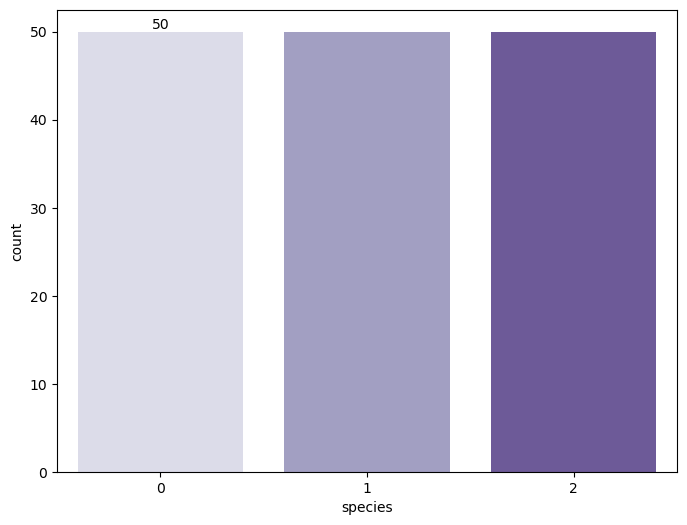

In [12]:
ax = sns.countplot(data = df, x ='species', palette='Purples')
ax.bar_label(ax.containers[0]);

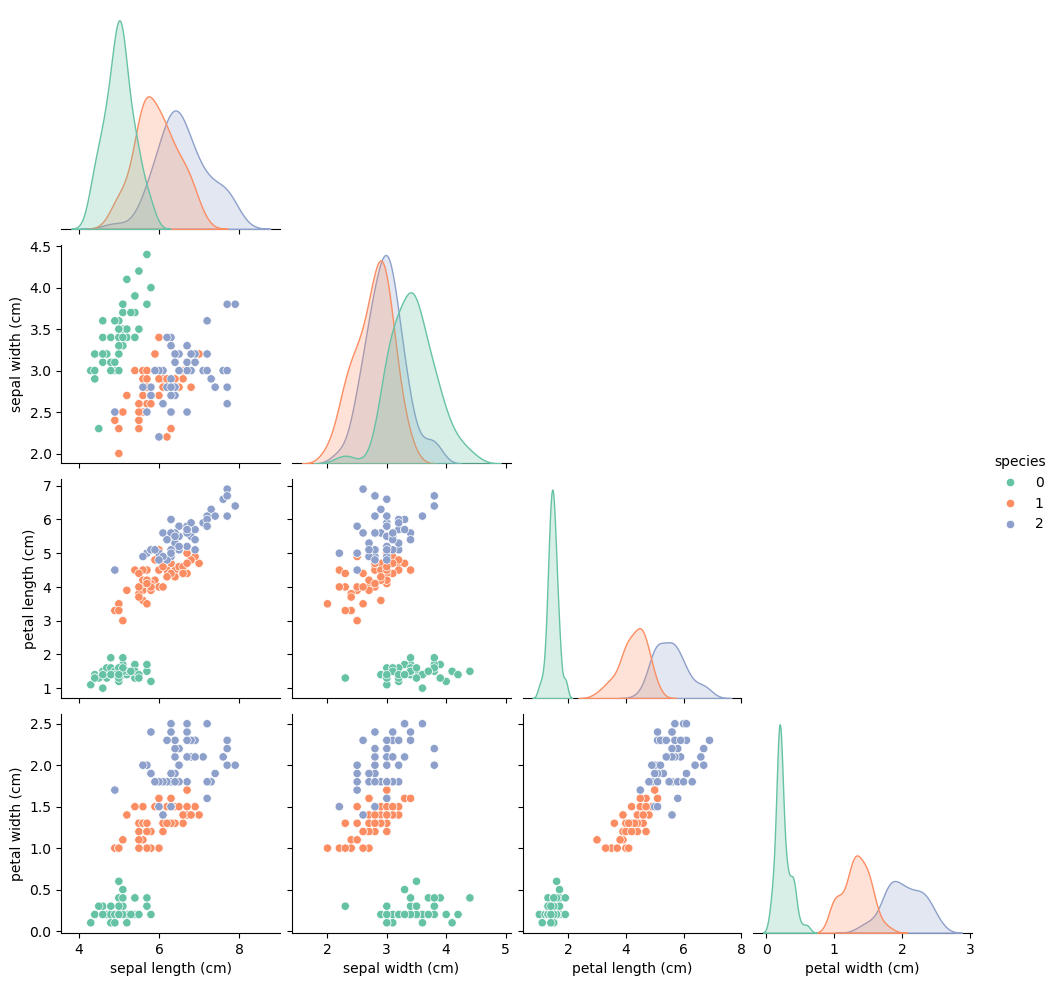

In [14]:
sns.pairplot(df, corner=True, hue='species', palette='Set2');

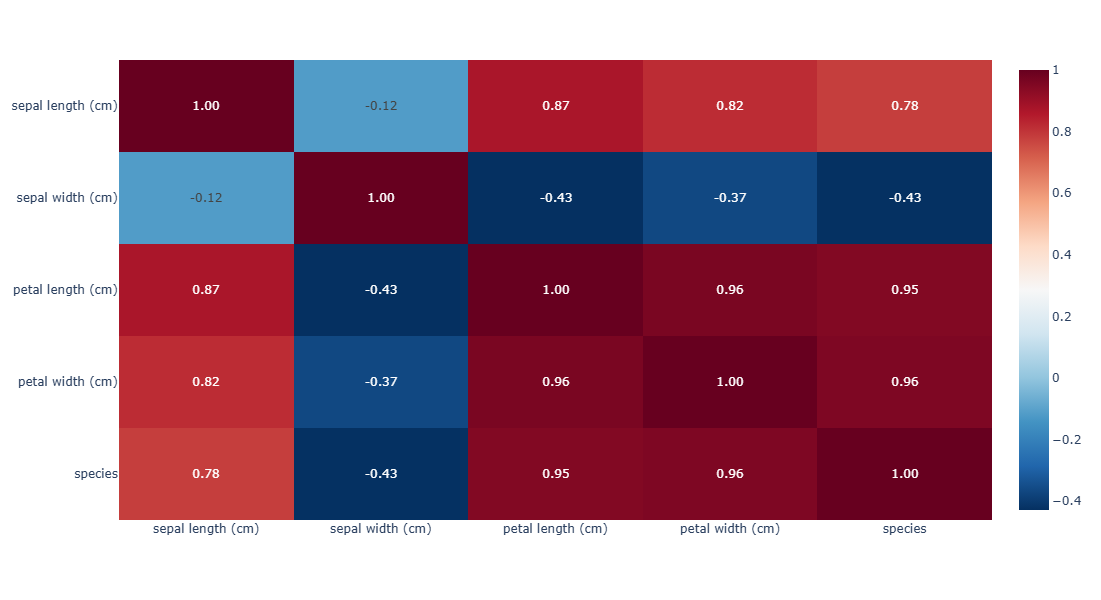

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')

fig.update_layout(width=700, height=600)
fig.show();

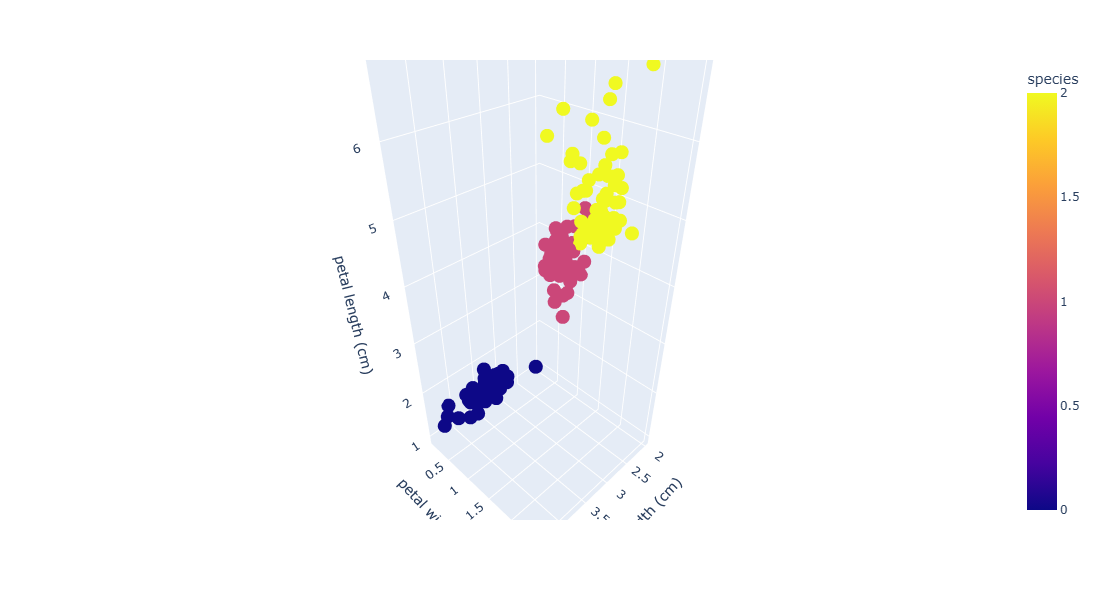

In [20]:
colors = df["species"]  
fig = px.scatter_3d(df,
                    x="sepal width (cm)",
                    y="petal width (cm)",
                    z="petal length (cm)",
                    color=colors,
                    )

fig.update_layout(width=600, height=600)

fig.show()

# <font color='mediumpurple'> <b>Defining X and y</b><font color='black'>  

In [22]:
X = df.drop(columns="species")
y = df["species"]

# <font color='mediumpurple'> <b>Train-Test Split</b><font color='black'>  

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

# <font color='mediumpurple'> <b>Modeling</b><font color='black'>  

## <font color='thistle'> <b>With Default Parameters</b><font color='black'>  

In [26]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [28]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

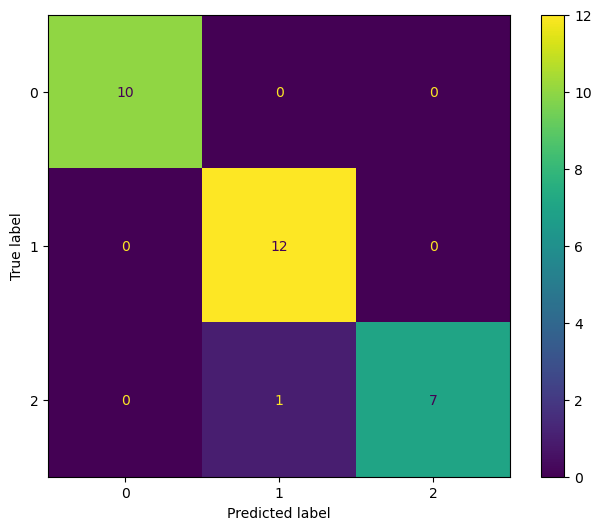

In [30]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

plt.show()

**For Versicolor:**

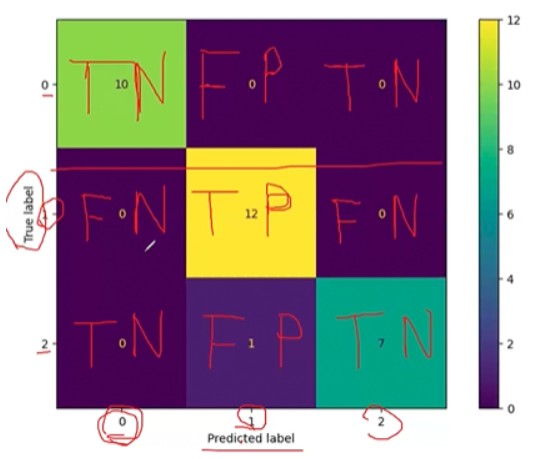

Here:
- 0 is setosa
- 1 is versicolor
- 2 is virginica

We accept the Versicolor part as 1 which is True, and the others (Setosa and Virginica) as 0 which is False.

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [34]:
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

print("Macro Average Metrics")
print(f"Precision: {precision_macro:.3f}, Recall: {recall_macro:.3f}, F1-score: {f1_macro:.3f}")
print("---")
print("Micro Average Metrics")
print(f"Precision: {precision_micro:.3f}, Recall: {recall_micro:.3f}, F1-score: {f1_micro:.3f}")
print("---")
print("Weighted Average Metrics")
print(f"Precision: {precision_weighted:.3f}, Recall: {recall_weighted:.3f}, F1-score: {f1_weighted:.3f}")
print("---")
print(f"Accuracy: {accuracy:.3f}")

Macro Average Metrics
Precision: 0.974, Recall: 0.958, F1-score: 0.964
---
Micro Average Metrics
Precision: 0.967, Recall: 0.967, F1-score: 0.967
---
Weighted Average Metrics
Precision: 0.969, Recall: 0.967, F1-score: 0.966
---
Accuracy: 0.967


## <font color='thistle'> <b>Cross Validation</b><font color='black'>  

In [36]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision_weighted','recall_weighted', 'f1_weighted'],
                        cv = 10, 
                        return_train_score=True
                       )

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.950
train_accuracy             0.964
test_precision_weighted    0.960
train_precision_weighted   0.964
test_recall_weighted       0.950
train_recall_weighted      0.964
test_f1_weighted           0.949
train_f1_weighted          0.964
dtype: float64

### <font color='thistle'> <b>Cross Validate for Versicolor</b><font color='black'>  

In [38]:
f1_versicolor = make_scorer(f1_score, average=None, labels= [1])

precision_versicolor = make_scorer(precision_score,
                                   average=None,
                                   labels=[1])

recall_versicolor = make_scorer(recall_score,
                                average=None,
                                labels=[1])

scoring = {
    "f1_versicolor": f1_versicolor,
    "precision_versicolor": precision_versicolor,
    "recall_versicolor": recall_versicolor
}

In [40]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor           0.924
train_f1_versicolor          0.943
test_precision_versicolor    0.940
train_precision_versicolor   0.950
test_recall_versicolor       0.925
train_recall_versicolor      0.936
dtype: float64

In [42]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba = np.round(y_pred_proba, 2)

In [44]:
test_data = pd.concat([X_test, y_test], axis=1)

test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]

test_data.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
68               6.200             2.200              4.500             1.500   
88               5.600             3.000              4.100             1.300   
114              5.800             2.800              5.100             2.400   
147              6.500             3.000              5.200             2.000   
50               7.000             3.200              4.700             1.400   

     species  pred  pred_proba_setosa  pred_proba_versicolar  \
68         1     1              0.000                  0.650   
88         1     1              0.100                  0.850   
114        2     2              0.000                  0.030   
147        2     2              0.000                  0.160   
50         1     1              0.010                  0.850   

     pred_proba_virginica  
68                  0.350  
88                  0.060  
114                 0.970  
147                 0.840  
50                  0.140

## <font color='thistle'> <b>With Best Parameters (GridsearchCV)</b><font color='black'>  

In [46]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]

model = Pipeline(steps=operations)

In [48]:
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# To get 20 C values ​​between -1 and 5.
# As C increases, regularization decreases.
# The reason for using np.logspace for C is that the optimal value of regularization is usually not within a certain range.
# Therefore, it makes sense to try different values ​​over a wide range and create values ​​on a logarithmic scale to find the value that works best.
C = np.logspace(-1, 5, 20)

# The four values ​​of solver are as follows.
# solver = ["lbfgs", "liblinear", "sag", "saga"]

# creating param_grid to get all combinations of penalty, C and solver
param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  # ElasticNet için l1_ratio ekliyoruz
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [50]:
grid_model = GridSearchCV(model,
                          param_grid= param_grid,
                          cv= 5,
                          return_train_score= True
                         )

In [52]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02,...
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [54]:
grid_model.best_params_

{'logistic__C': 16.23776739188721,
 'logistic__l1_ratio': 0.3333333333333333,
 'logistic__penalty': 'elasticnet',
 'logistic__solver': 'saga'}

In [56]:
y_pred = grid_model.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

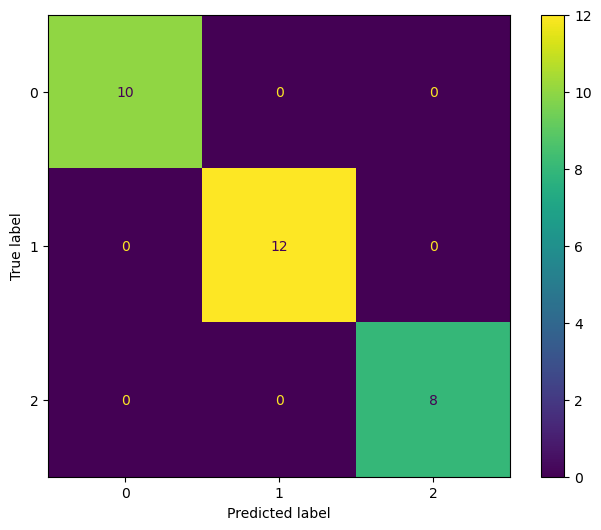

In [58]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()

In [60]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## <font color='thistle'> <b>ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>  

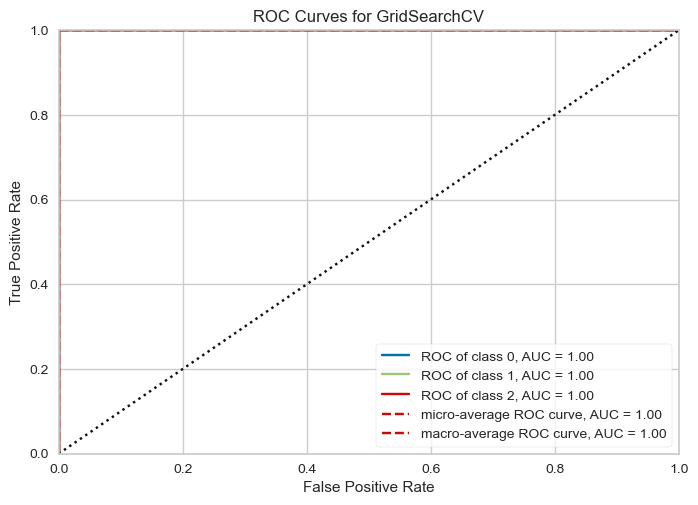

In [64]:
# RocCurveDisplay or precision_recall_curve does not work for multiclass data. It gives errors.

from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

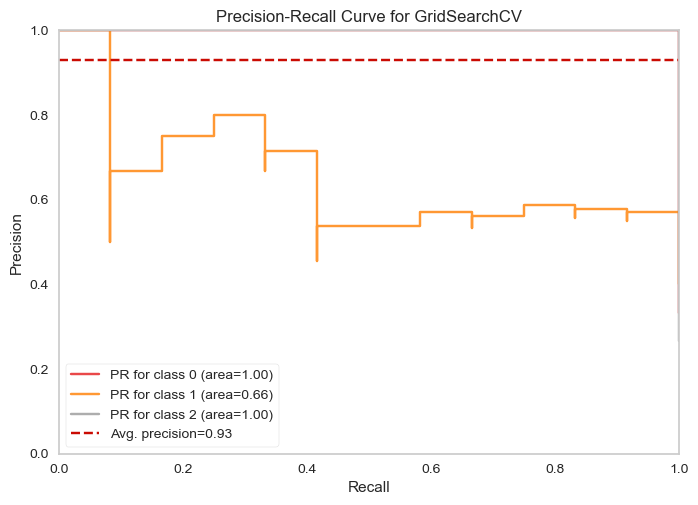

In [66]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True, # If we do not give this value (True) here, it will work as a binary.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# <font color='mediumpurple'> <b>Final Model</b><font color='black'>  

In [68]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(
                                                                            C=16.23776739188721,
                                                                            l1_ratio=0.3333333333333333,
                                                                            max_iter=5000,
                                                                            penalty='elasticnet',
                                                                            solver='saga'))]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=16.23776739188721,
                                    l1_ratio=0.3333333333333333, max_iter=5000,
                                    penalty='elasticnet', solver='saga'))])

In [70]:
import pickle

In [72]:
pickle.dump(final_model, open("final_model", "wb"))

# <font color='mediumpurple'> <b>Prediction</b><font color='black'>  

In [74]:
new_model = pickle.load(open("final_model", "rb"))

In [76]:
my_dict = {"sepal length (cm)": [4.2, 6.8, 5.5],
           "sepal width (cm)": [3.2, 2.7, 4],
           "petal length (cm)": [1.9, 5.1, 4.5],
           "petal width (cm)": [1.2, 0.5, 2]
          }

In [78]:
sample = pd.DataFrame(my_dict)
sample

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              4.200             3.200              1.900             1.200
1              6.800             2.700              5.100             0.500
2              5.500             4.000              4.500             2.000

In [80]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)

In [82]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              4.200             3.200              1.900             1.200   
1              6.800             2.700              5.100             0.500   
2              5.500             4.000              4.500             2.000   

   pred  pred_proba_setosa  pred_proba_versicolor  pred_proba_virginica  
0     0              0.991                  0.009                 0.000  
1     1              0.000                  1.000                 0.000  
2     1              0.092                  0.728                 0.181

<p style="background-color:mediumpurple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>